In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_raw = pd.read_csv('../city_location_datafit_check/King_County_House_prices_dataset_Acitydist.csv')

In [90]:
city_data =  pd.read_csv('../city_location_and_select/King_county_city_data.csv')
city_data.city

0                   Shoreline
1                  Des Moines
2                     Seattle
3                     Tukwila
4                    Bellevue
5                Cottage Lake
6                        Kent
7                     Kenmore
8                      Burien
9                    Issaquah
10                   Kirkland
11    Union Hill-Novelty Hill
12                  Sammamish
13                     Auburn
14                Federal Way
15                    Bothell
16                 Snoqualmie
17              Mercer Island
18                     Renton
19                  Covington
20                     SeaTac
21               Maple Valley
22                    Redmond
Name: city, dtype: object

(-122.56581397849462,
 -121.65418602150535,
 47.1223143598234,
 47.814585640176595)

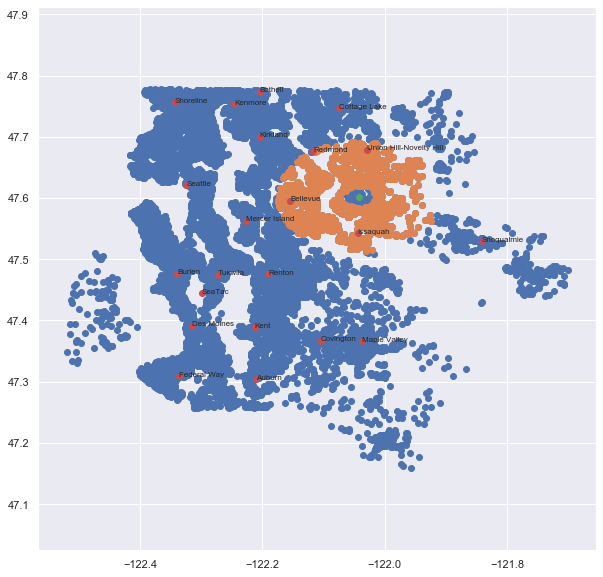

In [157]:
city = 'Sammamish'#'Kirkland'#'Bellevue'
plt.figure(figsize=(10,10))
plt.scatter(x='long',y='lat',data=df_raw[df_raw.long < -121.7])
plt.scatter(x='long',y='lat',data=df_raw[(df_raw[city] < 10) & 
                (df_raw[city] > 2) ])
plt.scatter(x='lng',y='lat',data=city_data[city_data.city == city])
d = city_data[city_data.city != city]
plt.scatter(x='lng',y='lat',data=d[d.city != city])
for c,lat,lng in zip(d.city,d.lat,d.lng):
    plt.text(lng,lat,c, fontsize=8)
plt.axis('equal')

In [133]:
price_limit = 2.5e6
lot_thres = 8000/0.092903


df_stat = pd.DataFrame(columns=['hits','population','low_price','low_price_lot','mean_lot'], index=city_data.city)
for city in city_data.city:
    df = df_raw[(df_raw[city] < 10) & 
                (df_raw[city] > 2) & 
                (df_raw['sqft_lot'] > lot_thres) & 
                (df_raw['price'] < price_limit)]

    df_stat.at[city,'hits'] = df.shape[0]
    df_stat.at[city,'low_price'] = df.price.min()
    df_stat.at[city,'low_price_lot'] = df[df.price == df.price.min()].sqft_lot.max()
    #print(city)
    a = city_data[city_data.city.str.contains(city)].population.max()
    df_stat.at[city,'population'] = a
    
df_stat

,hits,population,low_price,low_price_lot,mean_lot
city,,,,,
Shoreline,2,56189,420000,112384,NaN
Des Moines,15,31238,220000,94960,NaN
Seattle,0,3.64376e+06,NaN,NaN,NaN
Tukwila,16,20144,220000,94960,NaN
Bellevue,12,144444,440000,217800,NaN
Cottage Lake,62,23941,250000,87120,NaN
Kent,34,128458,220000,94960,NaN
Kenmore,10,22867,270000,209959,NaN
Burien,9,51671,275000,171190,NaN


/Users/arnescheunemann/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


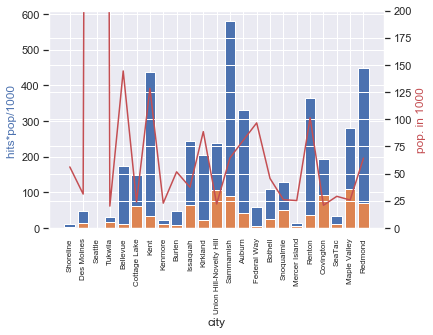

In [183]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
keys = df_stat.index
ax2.plot(keys,df_stat.population/1000,'r')
ax1.bar(keys,df_stat.hits*df_stat.population/10000)
ax1.bar(keys,df_stat.hits*1)
ax1.set_xlabel('city')
ax2.set_ylabel('pop. / 1000', color='r')
ax2.set_ylim([0,200])
ax1.set_ylabel('hits and hits*pop./10000 ', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

In [ ]:
# Take 

In [26]:
city_data.columns

Index(['Unnamed: 0', 'city', 'city_ascii', 'state_id', 'state_name',
       'county_fips', 'county_name', 'county_fips_all', 'county_name_all',
       'lat', 'lng', 'population', 'density', 'source', 'military',
       'incorporated', 'timezone', 'ranking', 'zips', 'id'],
      dtype='object')

In [50]:
city_data[city_data.city.str.contains('Des Moines')].population.max()

31238.0

In [46]:
city_data.city.str.contains('Des Moines')

0     False
1      True
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
Name: city, dtype: bool

In [186]:
# simmple predictor 
#city=['Kirkland','Bellevue']
city=['Kent','Redmond', 'Sammamish'] 
df = df_raw[(((df_raw[city[0]] < 10) & (df_raw[city[0]] > 2)) | 
             ((df_raw[city[1]] < 10) & (df_raw[city[1]] > 2)) |
             ((df_raw[city[2]] < 10) & (df_raw[city[2]] > 2)) ) & 
                (df_raw['sqft_lot'] > lot_thres) & 
                (df_raw['price'] < price_limit)]

df.shape

(157, 47)

(-122.56581397849462,
 -121.65418602150535,
 47.1223143598234,
 47.814585640176595)

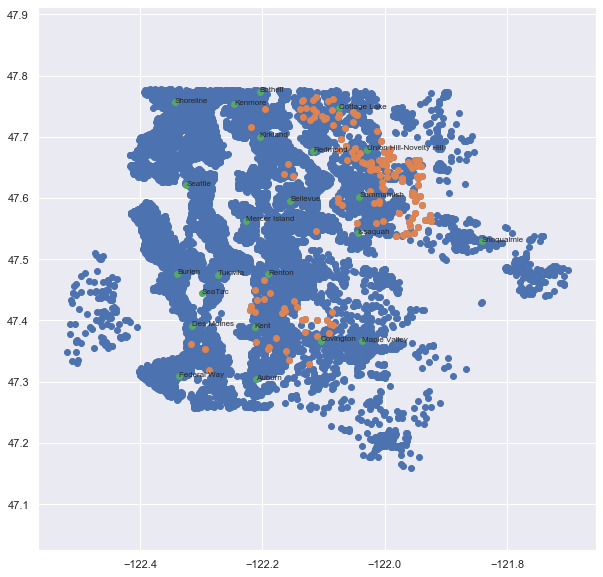

In [187]:
plt.figure(figsize=(10,10))
plt.scatter(x='long',y='lat',data=df_raw[df_raw.long < -121.7])
plt.scatter(x='long',y='lat',data=df)
d = city_data
plt.scatter(x='lng',y='lat',data=d)
for c,lat,lng in zip(d.city,d.lat,d.lng):
    plt.text(lng,lat,c, fontsize=8)
plt.axis('equal')

/Users/arnescheunemann/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


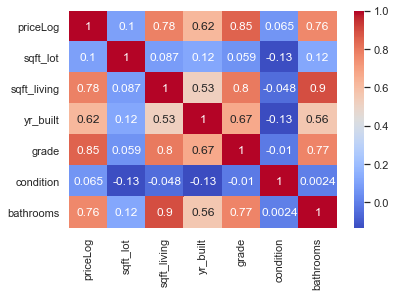

In [203]:
import seaborn as sns
sns.set()
df['priceLog'] = np.log(df.price)
sns.heatmap(df[['priceLog','sqft_lot','sqft_living','yr_built','grade','condition','bathrooms']].corr(),cmap='coolwarm',annot=True)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


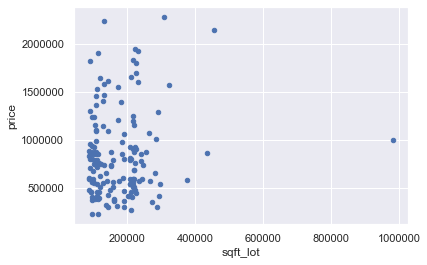

In [189]:
df.plot.scatter(x='sqft_lot',y='price')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


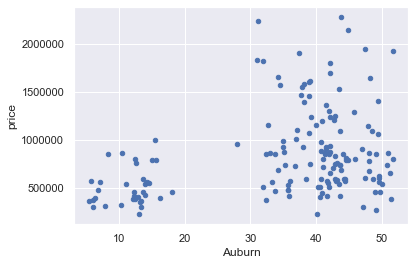

In [190]:
df.plot.scatter(x='Auburn',y='price')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


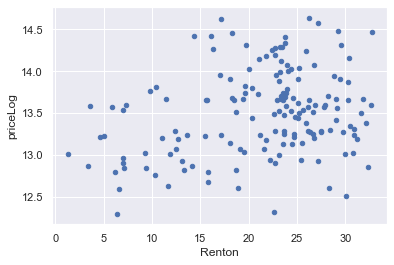

In [207]:
df.plot.scatter(x='Renton',y='priceLog')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


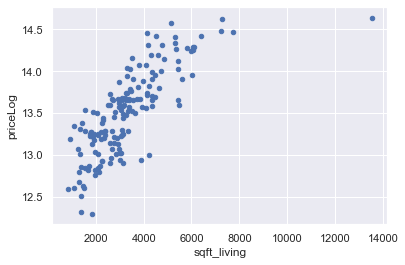

In [206]:
df.plot.scatter(x='sqft_living',y='priceLog')

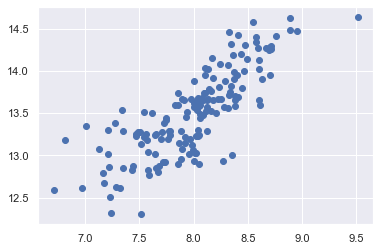

In [202]:
import numpy as np
t = np.log(df.sqft_living)
plt.plot(t,np.log(df.price),'o')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


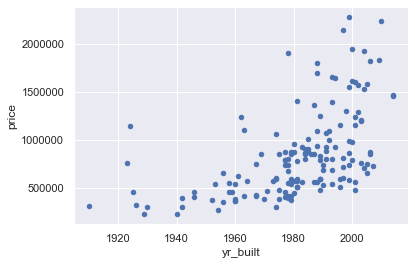

In [193]:

df.plot.scatter(x='yr_built',y='price')
#history cut at 1940 !!

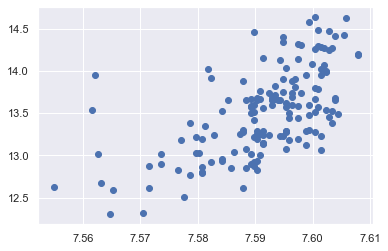

In [201]:
import numpy as np
t = np.log(df.yr_built)
plt.plot(t,np.log(df.price),'o')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


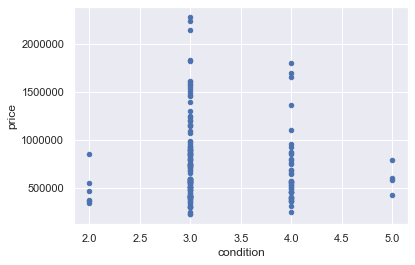

In [167]:
df.plot.scatter(x='condition',y='price')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


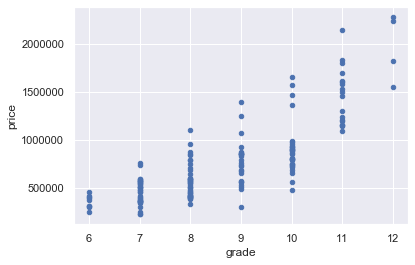

In [168]:
df.plot.scatter(x='grade',y='price')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


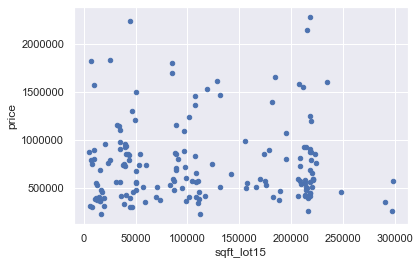

In [169]:
df.plot.scatter(x='sqft_lot15',y='price')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


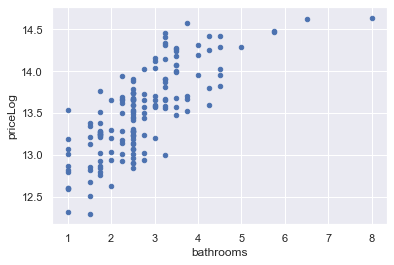

In [204]:
df.plot.scatter(x='bathrooms',y='priceLog')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


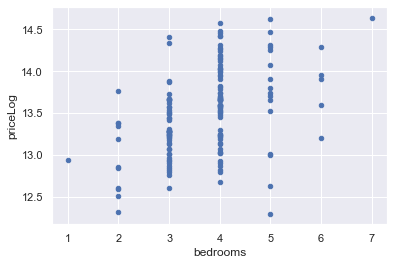

In [205]:
df.plot.scatter(x='bedrooms',y='priceLog')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


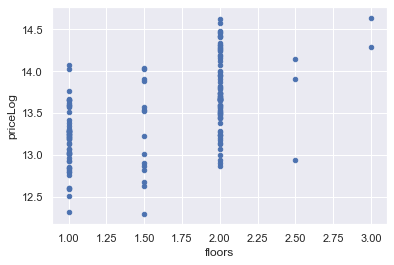

In [208]:
df.plot.scatter(x='floors',y='priceLog')

In [126]:
# Proprtion to get a somthing 
# over all target range lot and price  calc a propbulty of finding anything with this focus


# against the close to city

# season price impact


In [119]:
df.waterfront

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Mprice',
       'coord', 'Shoreline', 'Des Moines', 'Seattle', 'Tukwila', 'Bellevue',
       'Cottage Lake', 'Kent', 'Kenmore', 'Burien', 'Issaquah', 'Kirkland',
       'Union Hill-Novelty Hill', 'Sammamish', 'Auburn', 'Federal Way',
       'Bothell', 'Snoqualmie', 'Mercer Island', 'Renton', 'Covington',
       'SeaTac', 'Maple Valley', 'Redmond'],
      dtype='object')

In [122]:
df.sqft_living

519      3180
561      2340
858      1520
928      2570
1046     2040
1642     1510
2271     2560
2382     1720
3098     6550
3386     2160
3488     3120
3490     2840
3768     1830
3771     2960
4014     1540
4374     1290
4389     2200
4432     3090
4492     1620
4865     1490
4887     3490
4937     3110
5451     3370
5714     3760
5971     1460
6213     4090
6396     3750
6622     5440
7273     5480
7274     1860
         ... 
12363    2830
12724    2190
12770    1160
12831    4220
12838    2380
12937    1628
12953    2750
13023    2280
13142    2720
13672    3050
13837    2930
13839    2160
14374    2990
14674    2700
14736    2840
14938     820
15246    4080
15565    3130
15616    2100
17027    1690
17712    3030
17786    2550
18198    2140
18304    2880
18579    7320
18787    3250
18874    2670
19057    2650
19238    3650
19578    3750
Name: sqft_living, Length: 78, dtype: int64

In [151]:
df.shape

(77, 47)

In [153]:
df_raw.shape

(21597, 47)

In [154]:
77/21597

0.003565309996758809